The dataset provides essential details about each event, including disaster type, location, magnitude, date, fatalities, and economic damages, by simulating natural disaster occurrences in 2024. It has about 10,000 records and is about 300 KB in size

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("natural_disasters_2024.csv")
df.head()


,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
0,1,Wildfire,Brazil,6.267393,2024-01-01 00:00:00,9706,6.509790e+08
1,2,Hurricane,Indonesia,6.649358,2024-01-01 01:00:00,2233,5.538357e+08
2,3,Tornado,China,9.724366,2024-01-01 02:00:00,478,6.910998e+07
3,4,Flood,India,1.702505,2024-01-01 03:00:00,2867,8.474880e+08
4,5,Flood,Brazil,7.917748,2024-01-01 04:00:00,776,6.449297e+08


Drop irrelevant `Disaster_ID` column

In [3]:
df.drop("Disaster_ID", axis=1, inplace=True)
df.head()


,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss($)
0,Wildfire,Brazil,6.267393,2024-01-01 00:00:00,9706,6.509790e+08
1,Hurricane,Indonesia,6.649358,2024-01-01 01:00:00,2233,5.538357e+08
2,Tornado,China,9.724366,2024-01-01 02:00:00,478,6.910998e+07
3,Flood,India,1.702505,2024-01-01 03:00:00,2867,8.474880e+08
4,Flood,Brazil,7.917748,2024-01-01 04:00:00,776,6.449297e+08


### Data inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Disaster_Type     10000 non-null  object 
 1   Location          10000 non-null  object 
 2   Magnitude         10000 non-null  float64
 3   Date              10000 non-null  object 
 4   Fatalities        10000 non-null  int64  
 5   Economic_Loss($)  10000 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 468.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Magnitude,10000.0,5.559173e+00,2.619304e+00,1.000656e+00,3.263217e+00,5.589578e+00,7.829268e+00,9.999671e+00
Fatalities,10000.0,4.984929e+03,2.900114e+03,0.000000e+00,2.481750e+03,4.947000e+03,7.511250e+03,9.999000e+03
Economic_Loss($),10000.0,5.049752e+08,2.861325e+08,1.036597e+06,2.636352e+08,5.078407e+08,7.527256e+08,9.998528e+08


In [6]:
df.isnull().sum()


Disaster_Type       0
Location            0
Magnitude           0
Date                0
Fatalities          0
Economic_Loss($)    0
dtype: int64

In [7]:
df["Disaster_Type"].unique()

array(['Wildfire', 'Hurricane', 'Tornado', 'Flood', 'Earthquake'],
      dtype=object)

In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df["Season"] = pd.cut(df["Date"].dt.month, bins=[0, 2, 5, 9, 11, 12], labels=["Winter", "Summer", "Spring", "Autumn", "Winter"], ordered=False)


## Data visualization

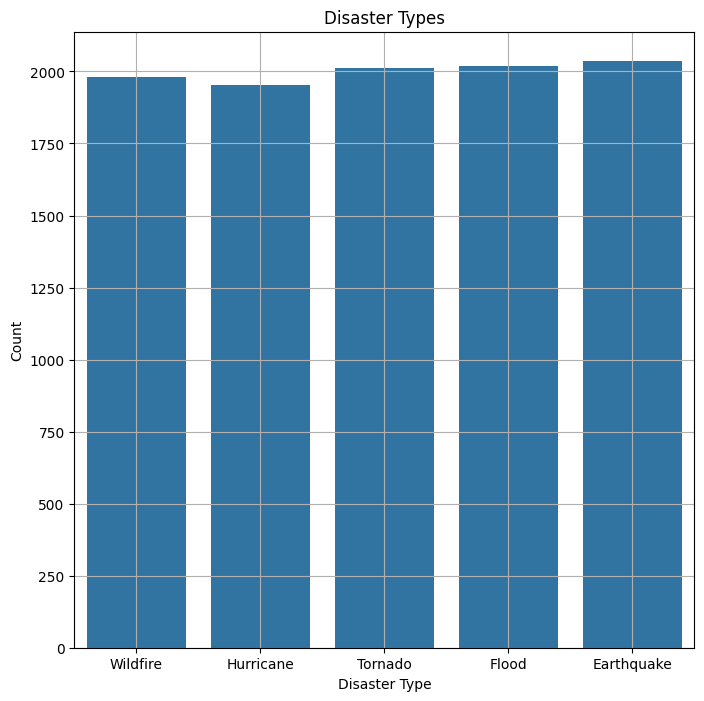

Disaster_Type
Earthquake    2036
Flood         2018
Tornado       2012
Wildfire      1982
Hurricane     1952
Name: count, dtype: int64


In [10]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x="Disaster_Type")
plt.title("Disaster Types")
plt.xlabel("Disaster Type")
plt.ylabel("Count")
plt.grid("y")
plt.show()
print(df["Disaster_Type"].value_counts())


`Earthquakes` are the most common disaster type, followed by `Floods` and `Tornado`.

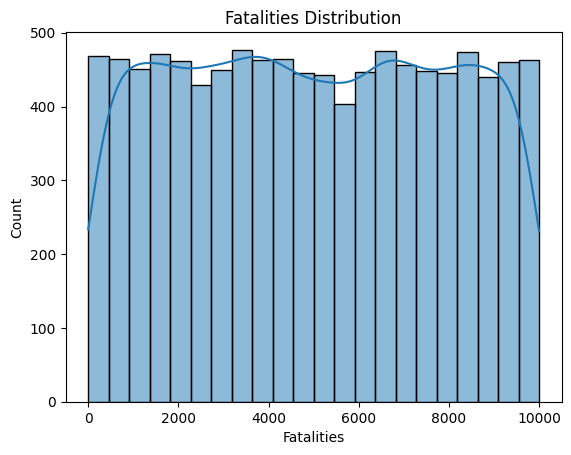

In [11]:
sns.histplot(df, x="Fatalities", kde=True)
plt.title("Fatalities Distribution")
plt.xlabel("Fatalities")
plt.ylabel("Count")
plt.show()

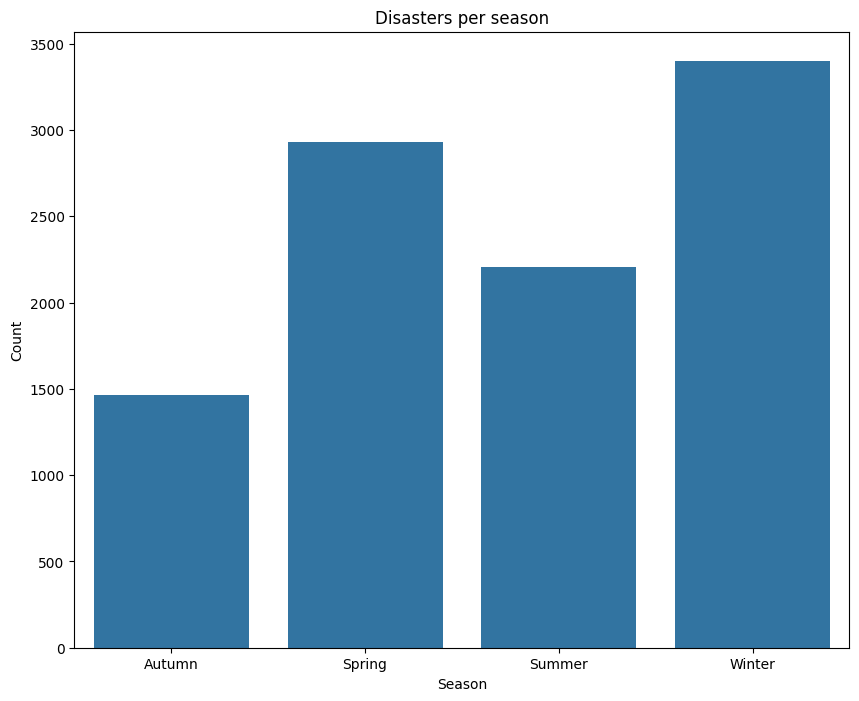

In [12]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x="Season")
plt.title("Disasters per season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

`Winter` is the season with the most disasters

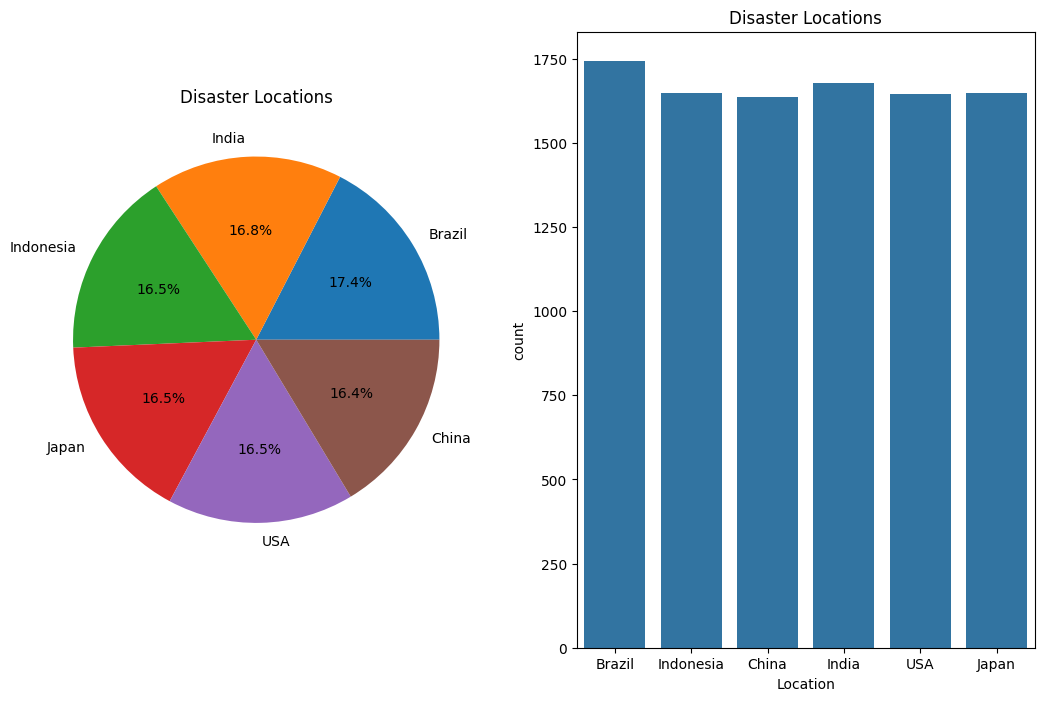

Location
Brazil       1743
India        1677
Indonesia    1649
Japan        1648
USA          1646
China        1637
Name: count, dtype: int64

In [13]:
fig, ax = plt.subplots(1,2, figsize=(13, 8))
ax[0].pie(df["Location"].value_counts(), labels=list(df["Location"].value_counts().index), autopct="%1.1f%%")
ax[0].set_title("Disaster Locations")

sns.countplot(df, x="Location", ax=ax[1])
ax[1].set_title("Disaster Locations")
plt.show()
df["Location"].value_counts()

`Brazil` was the city with the most occurances of natural disasters

In [14]:
fatality_range = pd.cut(df["Fatalities"], bins=[0, 2000, 4000, 6000, 8000, 10000], labels=["0-2000", "2000-4000", "4000-6000", "6000-8000", "8000-10000"])
df["Fatality Range"] = fatality_range

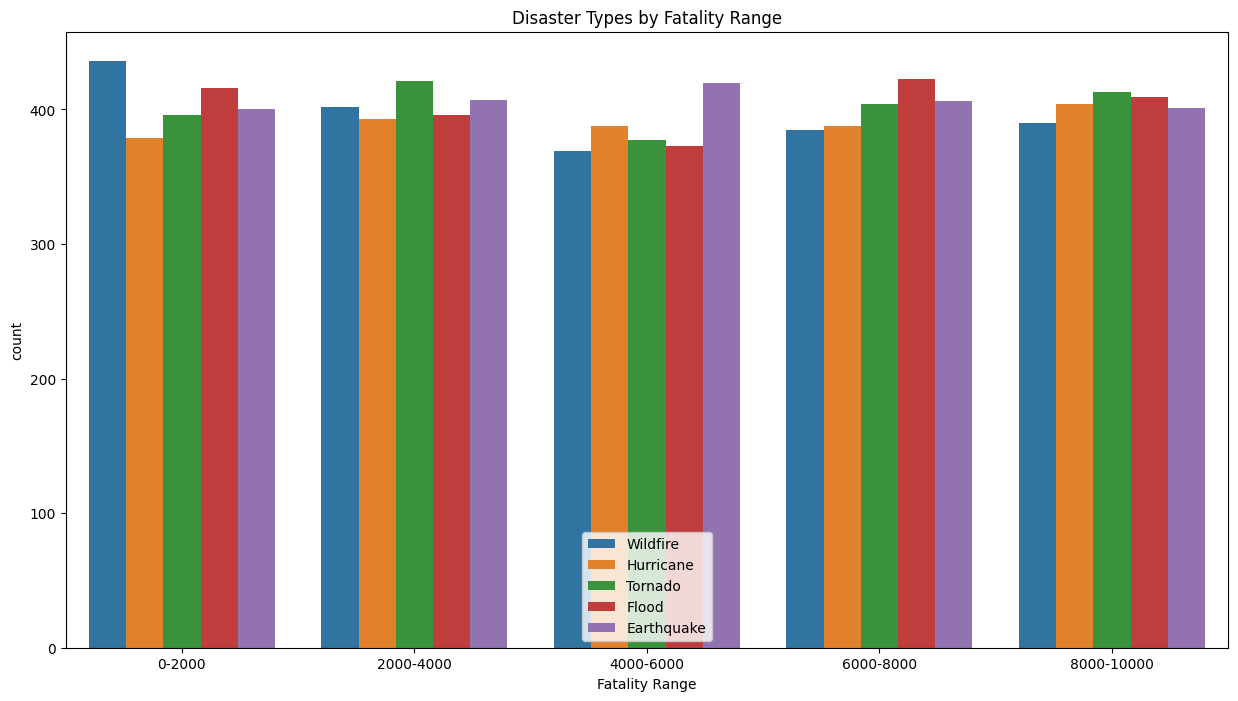

In [15]:
plt.figure(figsize=(15, 8))
sns.countplot(df, x="Fatality Range", hue="Disaster_Type")
plt.legend(loc="lower center")
plt.title("Disaster Types by Fatality Range")
plt.show()

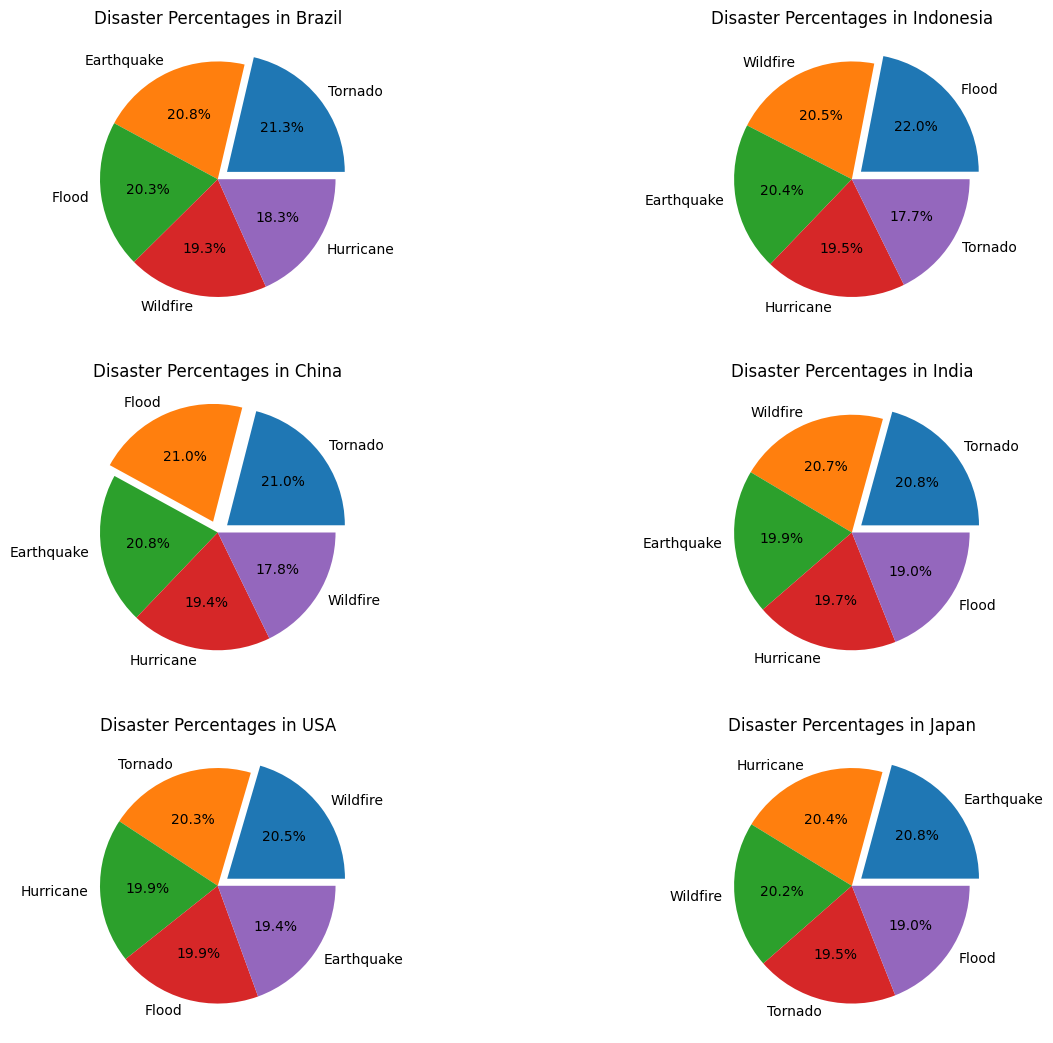

In [16]:
locations = list(df["Location"].unique())
datasets_per_location = {}
for name in locations:
    datasets_per_location[name] = (df[df["Location"] == name])

plt.figure(figsize=(15, 13))
for i, name in enumerate(datasets_per_location):
    plt.subplot(3, 2, i+1)
    values = datasets_per_location[name]["Disaster_Type"].value_counts()
    explosion = [0.1 if value == max(values) else 0 for value in values]
    plt.pie(values, labels=list(values.index), autopct="%1.1f%%", explode=explosion)
    plt.title(f"Disaster Percentages in {name}")
plt.show()

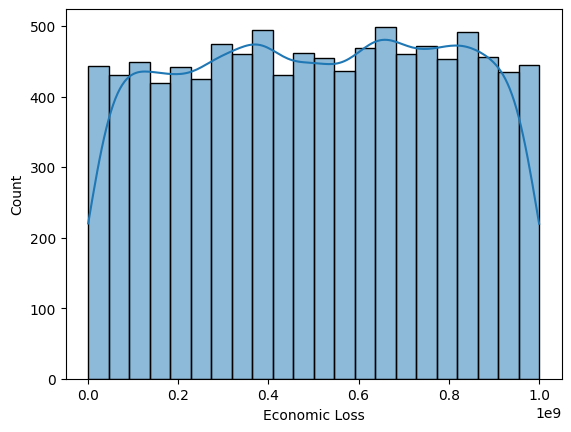

In [17]:
sns.histplot(df, x="Economic_Loss($)", kde=True)
plt.xlabel("Economic Loss")
plt.show()

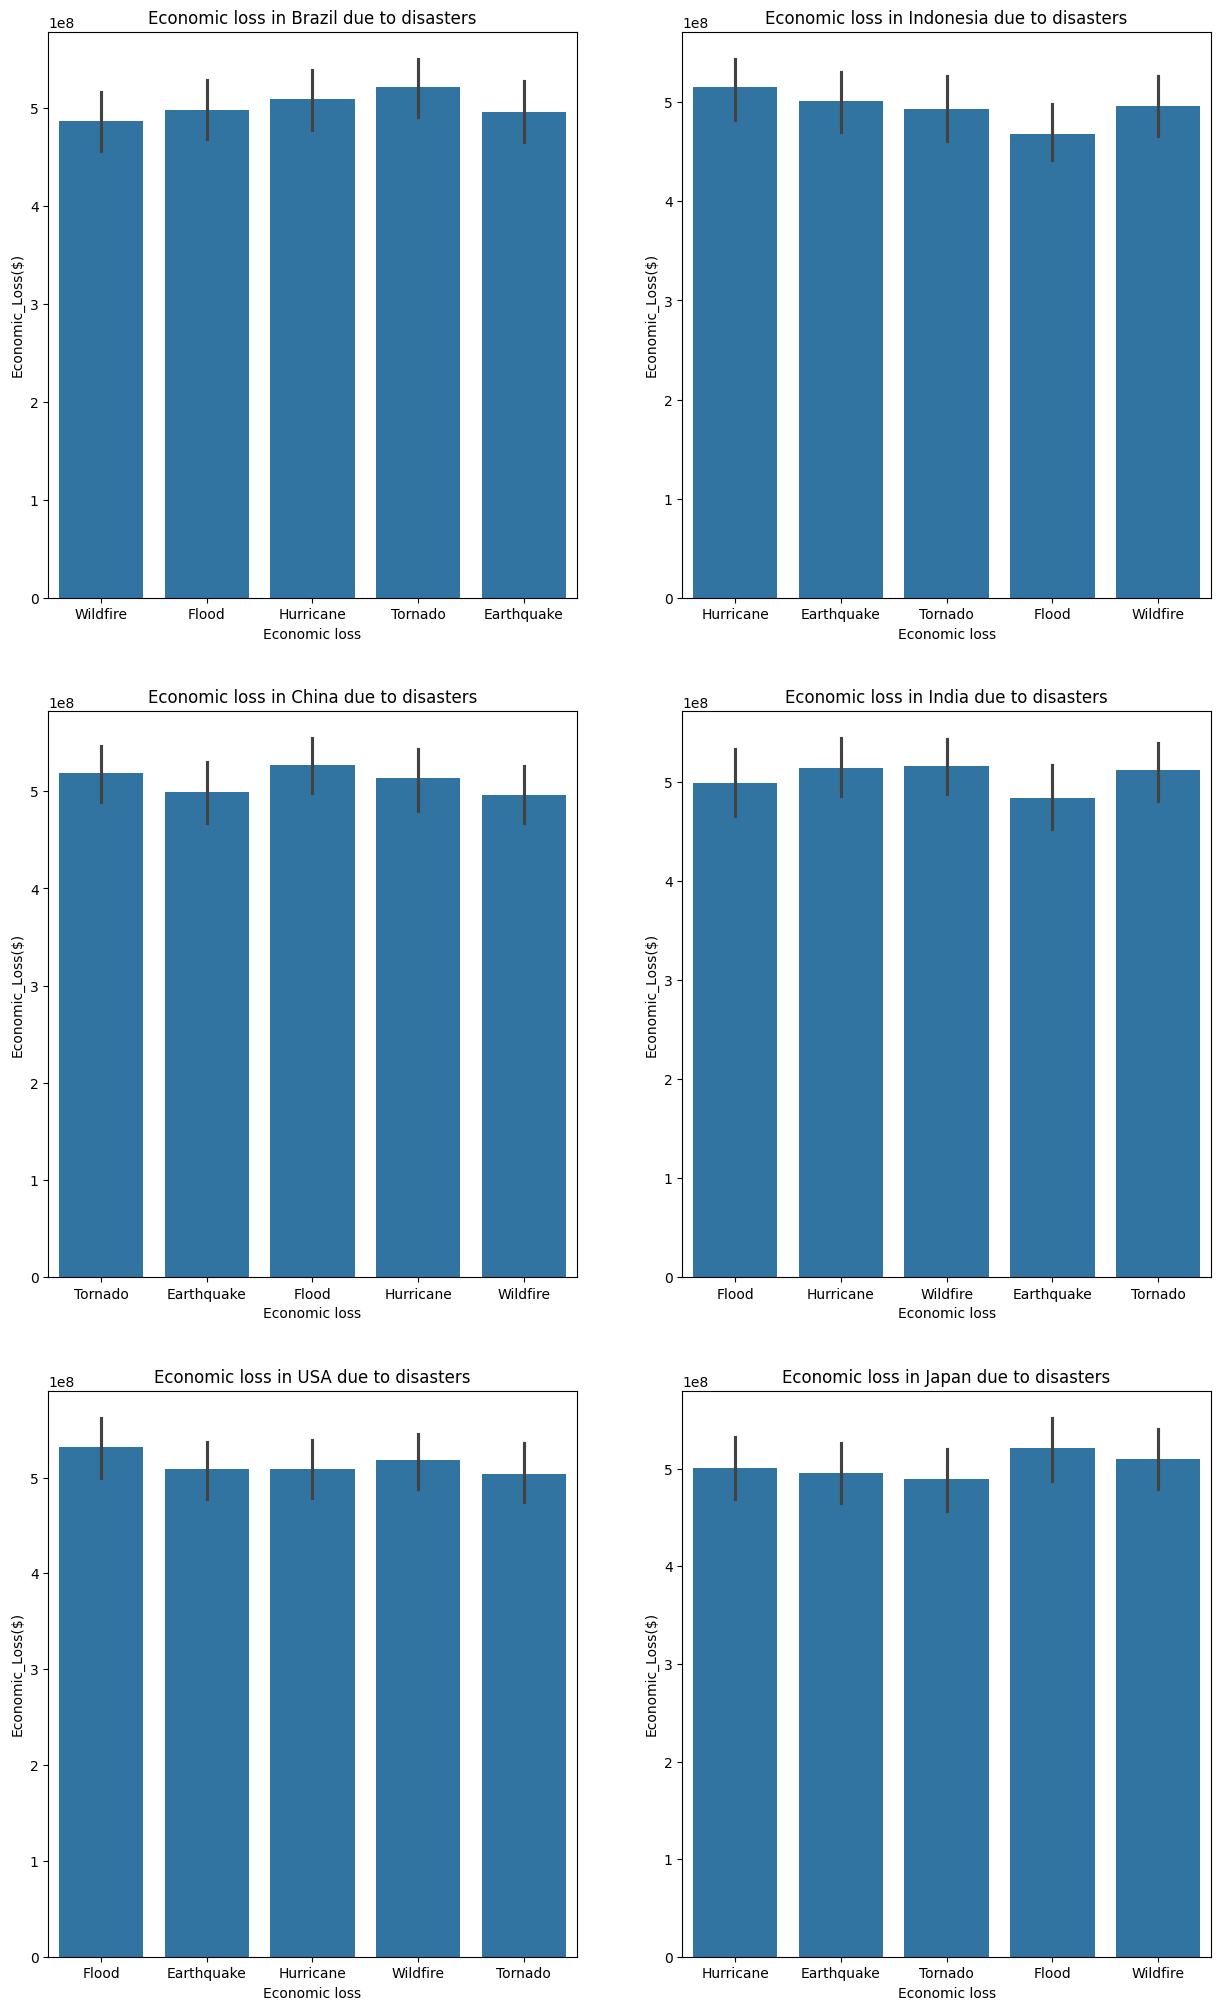

In [18]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 25))
for i, name in enumerate(datasets_per_location):
    plt.subplot(3, 2, i+1)
    sns.barplot(datasets_per_location[name], x="Disaster_Type", y="Economic_Loss($)")
    plt.title(f"Economic loss in {name} due to disasters")
    plt.xlabel("Economic loss")
plt.show()

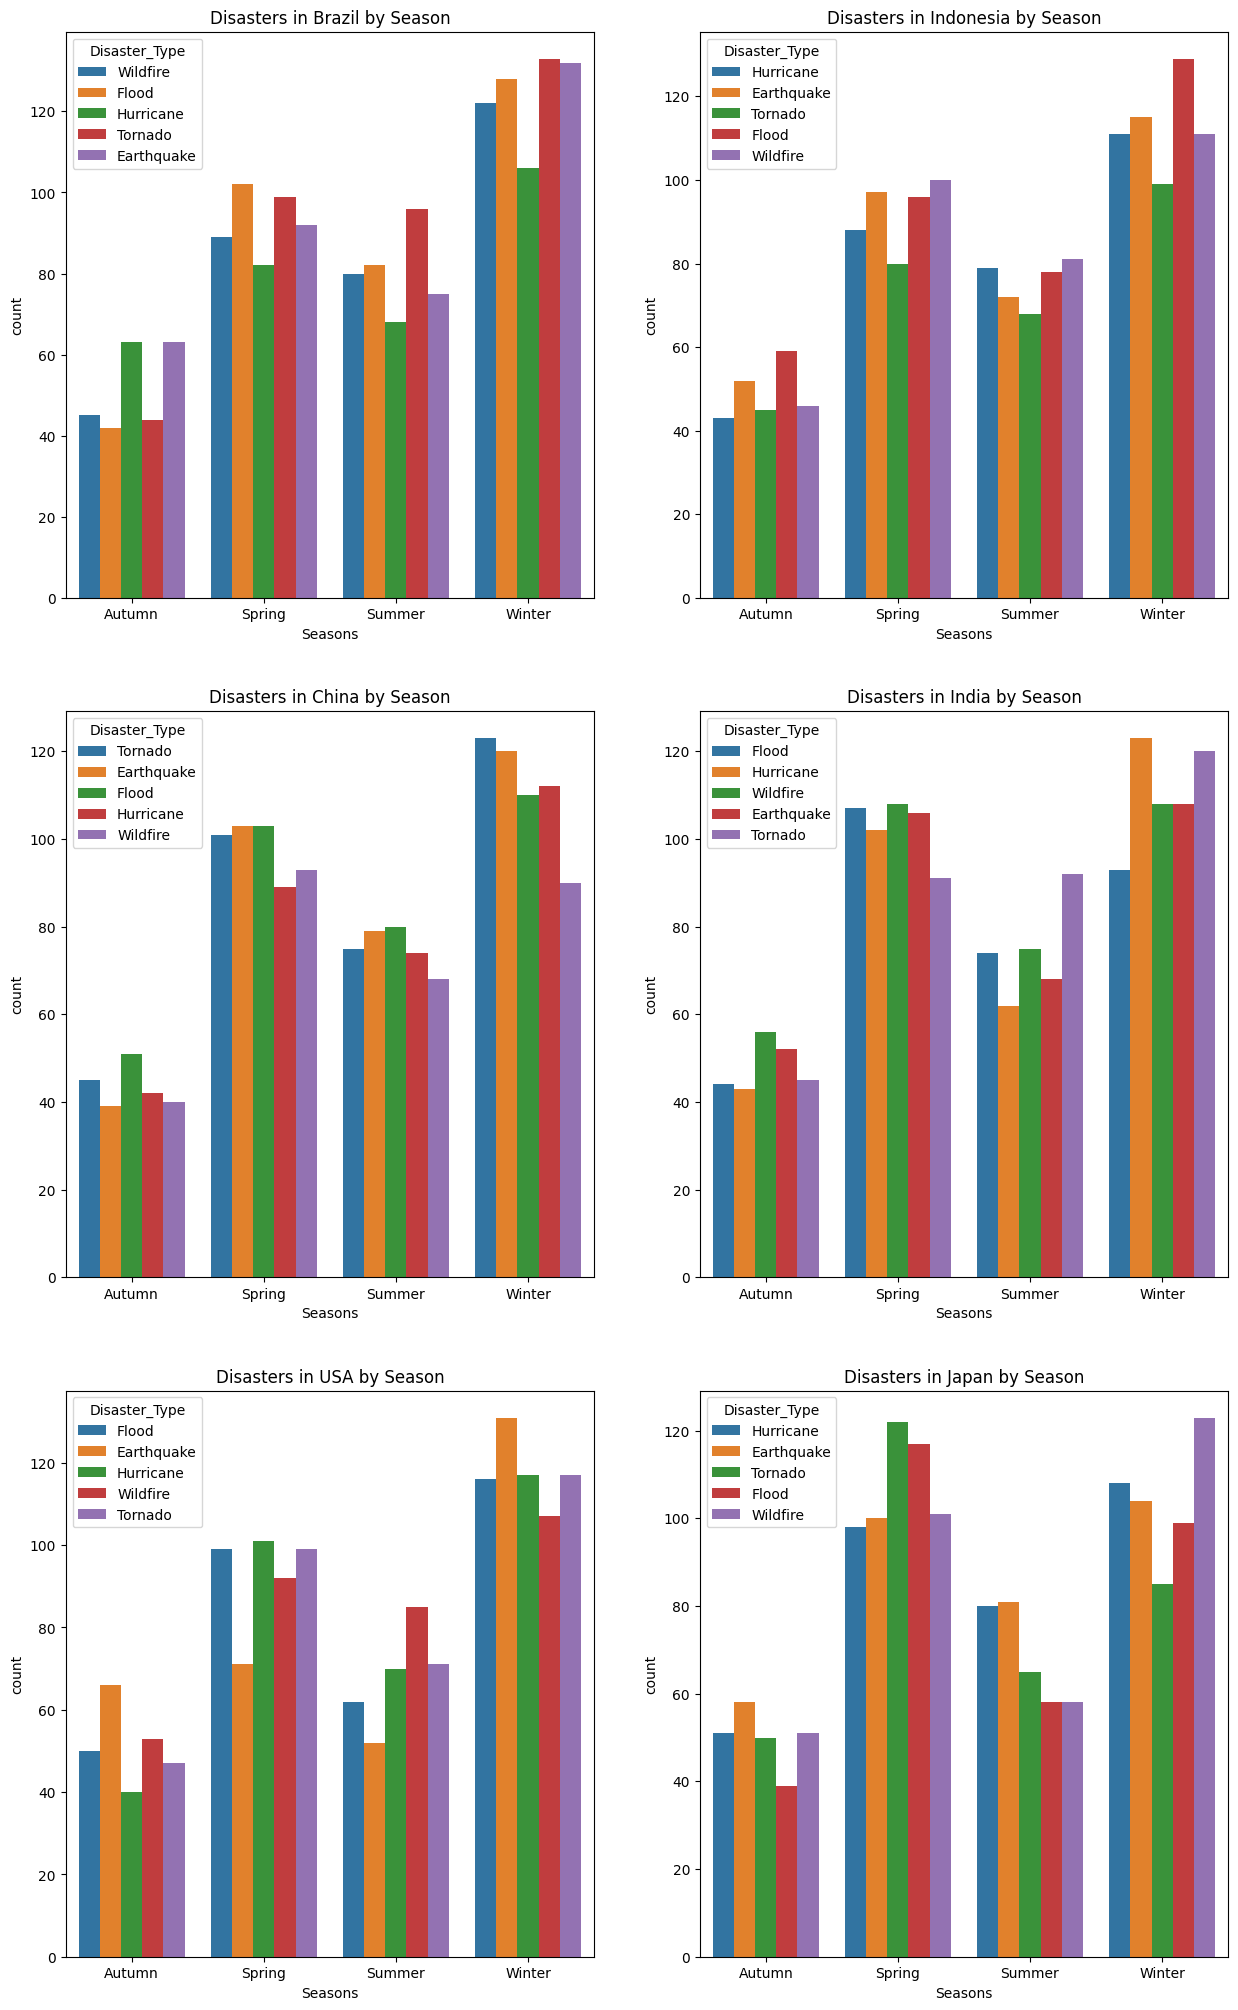

In [19]:
plt.figure(figsize=(15, 25))
for i, name in enumerate(datasets_per_location):
    plt.subplot(3, 2, i+1)
    sns.countplot(datasets_per_location[name], x="Season", hue="Disaster_Type")
    plt.title(f"Disasters in {name} by Season")
    plt.xlabel("Seasons")
plt.show()